# 🛠 Neural network classification with TensorFlow Exercises
01. Play with neural networks in the [TensorFlow Playground](https://playground.tensorflow.org/) for 10-minutes.    
 * Especially try different values of the learning, what happens when you
   decrease it? What happens when you increase it?
02. Replicate the model pictured in the TensorFlow Playground diagram below using TensorFlow code.
  * Compile it using the Adam optimizer, binary crossentropy loss and accuracy metric. Once it's compiled check a summary of the model.
03. Try this network out for yourself on the TensorFlow Playground website.
https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-tensorflow-playground-replication-exercise.png

**Hint:** there are 5 hidden layers but the output layer isn't pictured, you'll have to decide what the output layer should be based on the input data.

04. Create a classification dataset using Scikit-Learn's [make_moons()](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function, visualize it and then build a model to fit it at over 85% accuracy.
05. Train a model to get 88%+ accuracy on the `fashion MNIST` test set. Plot a `confusion matrix` to see the results after.
06. Recreate[TensorFlow's softmax activation](https://en.wikipedia.org/wiki/Softmax_function) function in your own code. Make sure it can accept a tensor and return that tensor after having the softmax function applied to it.
07. Create a function (or write code) to visualize multiple image predictions for the `fashion MNIST` at the same time.
  * Plot at least three different images and their prediction labels at the same time. **Hint:** see the [classification tutorial in the TensorFlow documentation](https://www.tensorflow.org/tutorials/keras/classification) for ideas.
08. Make a function to show an image of a certain class of the `fashion MNIST` dataset and make a prediction on it.
For example, plot 3 images of the T-shirt class with their predictions.

#02. Replicating the model

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
#creating the model
model= tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu')
])
#compiling
model.compile(loss=['binary_crossentropy'],
              optimizer= tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
model.build((None,1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 12        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 6)                 42        
                                                                 
 dense_3 (Dense)             (None, 6)                 42        
                                                                 
 dense_4 (Dense)             (None, 6)                 42        
                                                                 
 dense_5 (Dense)             (None, 6)                 42        
                                                                 
Total params: 222
Trainable params: 222
Non-trainable pa

# 04.Making a model for `make_moons()` dataset

In [ ]:
from sklearn.datasets import make_moons

In [ ]:
X, y=make_moons(n_samples=1000, random_state=42)

## EDA

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
#Creatinf test and train splits
X_train, y_train= X[:800], y[:800]
X_test, y_test=X[800:], y[800:]

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [ ]:
df= pd.DataFrame({"X0": X[:,0], "X1":X[:,1], "labels":y})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X0      1000 non-null   float64
 1   X1      1000 non-null   float64
 2   labels  1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [ ]:
df.head()

,X0,X1,labels
0,0.008727,0.368174,1
1,0.921384,-0.496905,1
2,0.940226,-0.498212,1
3,0.465875,-0.345406,1
4,-0.850412,0.526117,0


### Visualizing data

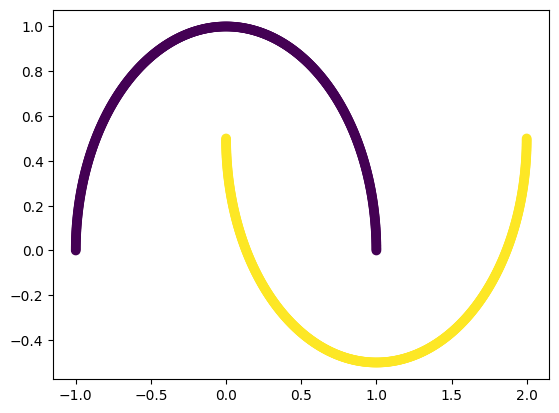

In [ ]:
plt.scatter(df["X0"], df["X1"], c=df['labels'])

## Modelling

In [ ]:
model_1= tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_1.compile(loss=['binary_crossentropy'],
                optimizer= tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 2s 4ms/step - loss: 1.2311 - accuracy: 0.8450
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 1.1169 - accuracy: 0.8512
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 1.1007 - accuracy: 0.8500
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 1.0913 - accuracy: 0.8550
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 1.0585 - accuracy: 0.8575
Epoch 6/100
25/25 [==============================] - 0s 7ms/step - loss: 1.0074 - accuracy: 0.8562
Epoch 7/100
25/25 [==============================] - 0s 7ms/step - loss: 0.9431 - accuracy: 0.8587
Epoch 8/100
25/25 [==============================] - 0s 4ms/step - loss: 0.8629 - accuracy: 0.8487
Epoch 9/100
25/25 [==============================] - 0s 10ms/step - loss: 0.8337 - accuracy: 0.8487
Epoch 10/100
25/25 [==============================] - 0s 5ms/step - loss: 0.8286 - accuracy: 0.8487
Epoch 11

In [ ]:
model_1.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.2500 - accuracy: 0.8450


[0.25002148747444153, 0.8450000286102295]

In [ ]:
model_2= tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.6352 - accuracy: 0.7750
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5247 - accuracy: 0.8325
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4467 - accuracy: 0.8325
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3896 - accuracy: 0.8388
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.3506 - accuracy: 0.8425
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3223 - accuracy: 0.8500
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3015 - accuracy: 0.8612
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2850 - accuracy: 0.8687
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2714 - accuracy: 0.8763
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2602 - accuracy: 0.8775
Epoch 11/

In [ ]:
model_2.evaluate(X_test, y_test)

7/7 [==============================] - 0s 5ms/step - loss: 0.0702 - accuracy: 0.9850


[0.07024848461151123, 0.9850000143051147]

In [ ]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.01  # step size in the mesh

    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the value for each grid point
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Reshape the predictions to match the grid shape
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and the training examples
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.xlabel('Purple')
    plt.ylabel('Yellow')
    plt.title('Decision Boundary')
    plt.show()


5469/5469 [==============================] - 9s 2ms/step


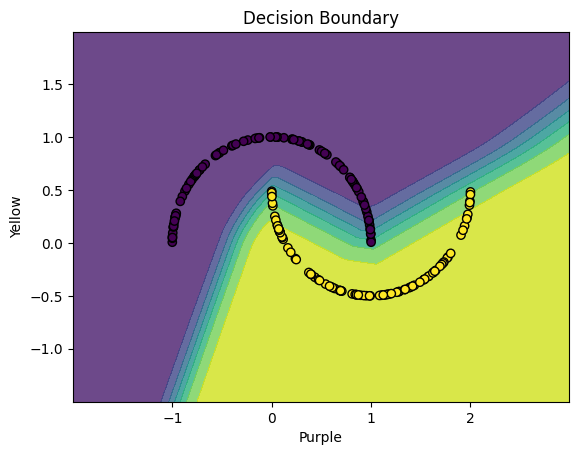

In [ ]:
plot_decision_boundary(model_2, X_test, y_test)

## 05. Train a model for `Fashion_mnist()`

In [ ]:
#Getting data ready
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
(X_train, y_train), (X_test, y_test)=fashion_mnist.load_data()

### EDA

In [ ]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [ ]:
X_train.max()

255

In [ ]:
labels=['T-shirt/top',
'Trouser',
'Pullover',
'Dress',
'Coat',
'Sandal',
'Shirt',
'Sneaker',
'Bag',
'Ankle boot']
len(labels)

10

In [ ]:
y_train[0]

9

In [ ]:
# Normalizing the data
X_train_norm= X_train/255

In [ ]:
X_test_norm= X_test/255

### Visualizing the data

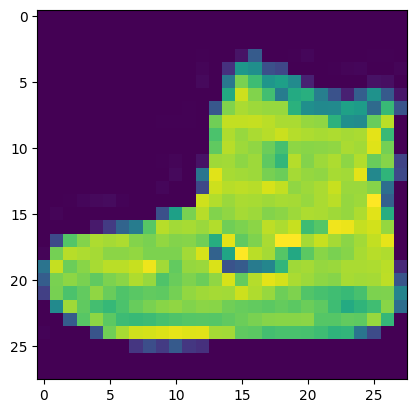

In [ ]:
plt.imshow(X_train_norm[0])

In [ ]:
#defining a function to plot random images
def random_images(images):
  plt.figure(figsize=(10,5))
  for i in range(1,5):
    rn= np.random.randint(len(images))
    plt.subplot(1,5,i)
    plt.imshow(images[rn], cmap= plt.cm.binary)
    plt.axis(False)
    plt.title(labels[y_train[rn]])


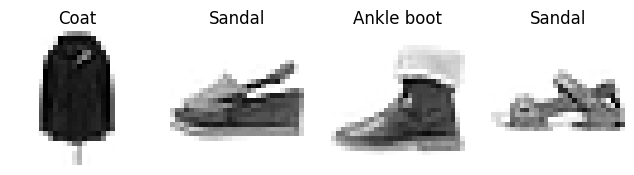

In [ ]:
random_images(X_train)

### Modelling

In [ ]:
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_3.compile(loss='binary_crossentropy',
                optimizer= tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
model_3.fit(X_train_norm[:1000], y_train[:1000], epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: -8.8434 - accuracy: 0.1069
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: -33.4472 - accuracy: 0.1047
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: -38.2660 - accuracy: 0.1044
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: -40.0132 - accuracy: 0.1037
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: -41.1024 - accuracy: 0.1042
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: -41.7912 - accuracy: 0.1043
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: -42.2864 - accuracy: 0.1046
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: -42.9370 - accuracy: 0.1054
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: -43.6259 - accuracy: 0.1055
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: -44.0372 - accurac

In [ ]:
model_4= tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
model_4.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=['accuracy'])
model_4.fit(X_train_norm, y_train, epochs=25)

Epoch 1/25
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0401 - accuracy: 0.6180
Epoch 2/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7111 - accuracy: 0.7366
Epoch 3/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6781 - accuracy: 0.7518
Epoch 4/25
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6572 - accuracy: 0.7611
Epoch 5/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6447 - accuracy: 0.7672
Epoch 6/25
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6340 - accuracy: 0.7701
Epoch 7/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6257 - accuracy: 0.7750
Epoch 8/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6190 - accuracy: 0.7770
Epoch 9/25
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6133 - accuracy: 0.7796
Epoch 10/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.608

In [ ]:
model_4.evaluate(X_test_norm, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.6316 - accuracy: 0.7777


[0.6315865516662598, 0.7777000069618225]

In [ ]:
model_4= tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
model_4.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.02),
                metrics=['accuracy'])
model_4.fit(X_train_norm, y_train, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 7s 3ms/step - loss: 1.2113 - accuracy: 0.5109
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6170 - accuracy: 0.7787
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5296 - accuracy: 0.8151
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4908 - accuracy: 0.8297
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4695 - accuracy: 0.8368
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4533 - accuracy: 0.8411
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4423 - accuracy: 0.8460
Epoch 8/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4334 - accuracy: 0.8473
Epoch 9/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4261 - accuracy: 0.8499
Epoch 10/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.420

In [ ]:
from sklearn.metrics import confusion_matrix
y_preds=model_4.predict(X_test_norm)


313/313 [==============================] - 1s 1ms/step


In [ ]:
cm=confusion_matrix(y_test, tf.argmax(y_preds, axis=1))

In [ ]:
cm

array([[821,  10,  24,  49,   1,   1,  89,   1,   4,   0],
       [  4, 961,   5,  23,   3,   0,   0,   0,   4,   0],
       [ 10,   6, 792,  15,  78,   0,  92,   0,   7,   0],
       [ 34,  16,  14, 883,  23,   1,  25,   0,   4,   0],
       [  0,   1, 147,  53, 717,   0,  76,   0,   6,   0],
       [  0,   1,   0,   0,   0, 949,   0,  24,   7,  19],
       [177,   6, 135,  40,  81,   0, 552,   0,   9,   0],
       [  0,   0,   0,   0,   0,  42,   0, 941,   1,  16],
       [  1,   8,  16,   4,  12,   7,   7,   5, 940,   0],
       [  0,   0,   0,   0,   0,  24,   1,  46,   0, 929]])

In [ ]:
import seaborn as sns

([<matplotlib.axis.YTick at 0x7fe98c135c00>,
 [Text(0, 0, 'T-shirt/top'),
  Text(0, 1, 'Trouser'),
  Text(0, 2, 'Pullover'),
  Text(0, 3, 'Dress'),
  Text(0, 4, 'Coat'),
  Text(0, 5, 'Sandal'),
  Text(0, 6, 'Shirt'),
  Text(0, 7, 'Sneaker'),
  Text(0, 8, 'Bag'),
  Text(0, 9, 'Ankle boot')])

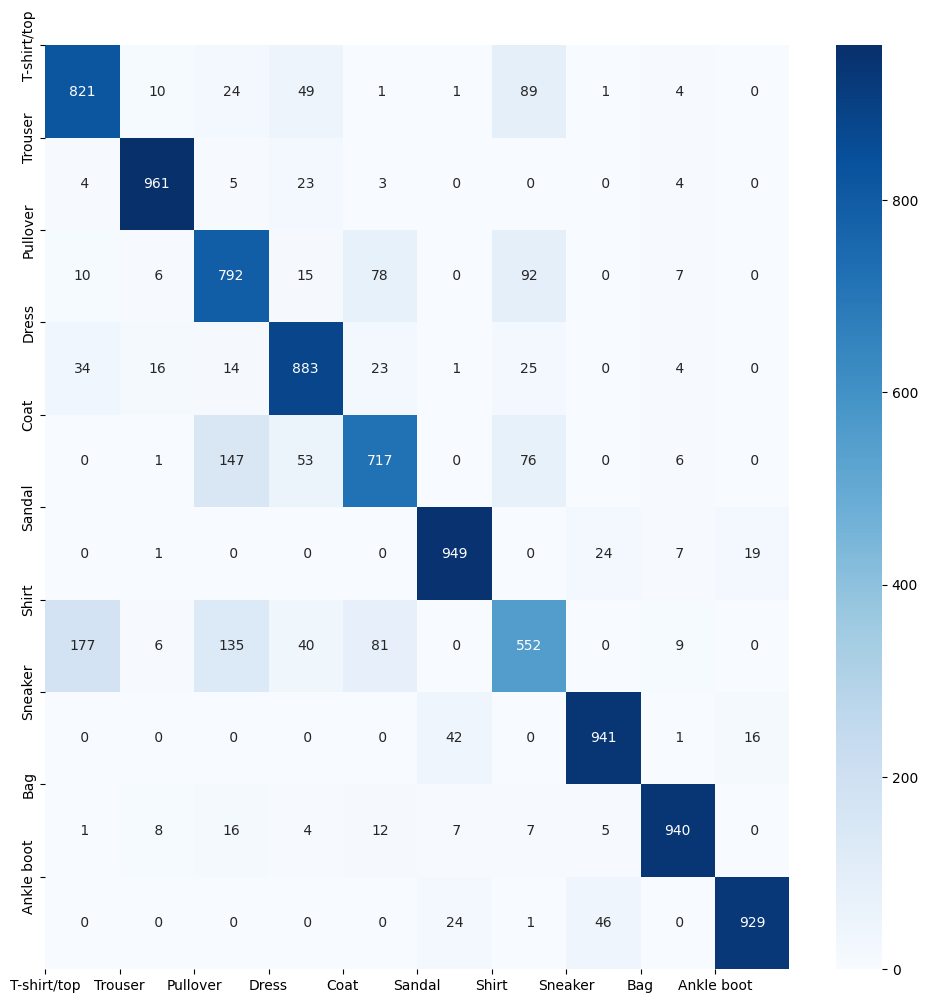

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, cmap= plt.cm.Blues, fmt='2')
plt.xticks(np.arange(len(labels)),labels)
plt.yticks(np.arange(len(labels)),labels)

## 07.Function to plot multiple images

In [ ]:
def random_images(model, images):
  plt.figure(figsize=(10,5))
  for i in range(1,5):
    rn= np.random.randint(len(images))
    plt.subplot(1,4,i)
    plt.imshow(images[rn], cmap= plt.cm.binary)
    pred = model.predict(images[rn].reshape(-1,784),verbose=0)
    plt.axis(False)
    plt.title(f"{labels[y_test[rn]]}||{labels[pred.argmax()]}");

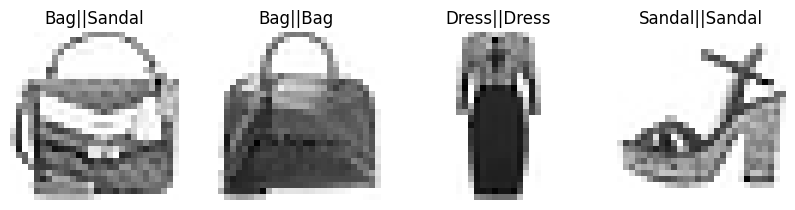

In [ ]:
random_images(model_4, X_test_norm)

## 08. Making a function to plot images of certain class an predict on it

In [ ]:
def random_images(model, images):
  plt.figure(figsize=(10,5))
  while True:
    rn= np.random.randint(len(images))
    if labels[y_test[rn]]=='Shirt':
      for n in range(1,5):
        plt.subplot(1,4,n)
        plt.imshow(images[rn], cmap= plt.cm.binary)
        pred = model.predict(images[rn].reshape(-1,784),verbose=0)
        plt.axis(False)
        plt.title(f"{labels[y_test[rn]]}||{labels[pred.argmax()]}");
      break

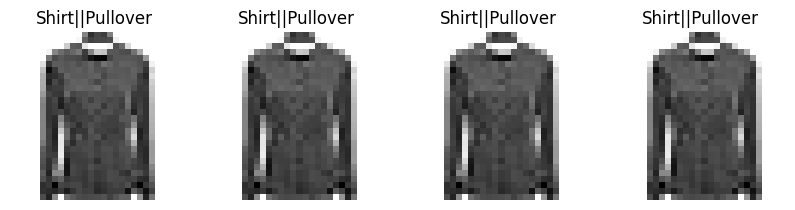

In [ ]:
random_images(model_4, X_test_norm)

# ✅ Exercise Done